Acesso imagens drive: https://drive.google.com/drive/folders/1_KK4xYD5QhyJSEy-emBfRqp6YKCD9fBw?usp=sharing

## Redes Neurais Convolucionais

Uma Rede Neural Convolucional (ConvNet / Convolutional Neural Network / CNN) é um algoritmo de Aprendizado Profundo que pode captar uma imagem de entrada, atribuir importância (pesos e vieses que podem ser aprendidos) a vários aspectos / objetos da imagem e ser capaz de diferenciar um do outro. O pré-processamento exigido em uma ConvNet é muito menor em comparação com outros algoritmos de classificação. Enquanto nos métodos primitivos os filtros são feitos à mão, com treinamento suficiente, as ConvNets têm a capacidade de aprender esses filtros / características. Em 1962, Hubel e Wiesel fizeram um experimento mostrando que alguns neurônios são ativados juntos quando expostos a algumas linhas ou curvas, conseguindo assim produzir o reconhecimento visual.
Essa é a basicamente a ideia principal de uma Rede Convolucional: filtrar linhas, curvas e bordas e em cada camada acrescida transformar essa filtragem em uma imagem mais complexa.

In [1]:
!pip install geopandas
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 20.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import pandas as pd
from pylab import rcParams
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 18, 6
from sklearn.model_selection import train_test_split

Vamos definir os caminhos:

In [ ]:
path_train = '/content/drive/MyDrive/Formacoes/Geoprocessamento/Pivos/train_dataset'
path_test = '/content/drive/MyDrive/Formacoes/Geoprocessamento/Pivos/teste'

In [ ]:
class_list = os.listdir(path_train)

Vamos listar as classes que temos em nosso conjunto de dados e importar as imagens:

In [ ]:
print(class_list)

['pivot', 'not_pivot']


In [ ]:
Y = []
X = []
i = 0
for i in range(len(class_list)):
  path_class = os.path.join(path_train,class_list[i])
  img_list = os.listdir(path_class)
  for n in range(len(img_list)):
    path_img = os.path.join(path_class,img_list[n])
    src = rasterio.open(path_img)
    im = src.read()
    im = im.transpose([1,2,0])
    im = im.astype('uint8')
    print(str(n) + '_' + class_list[i])
    Y.append(i)
    X.append(im)

0_pivot
1_pivot
2_pivot
3_pivot


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


4_pivot
5_pivot
6_pivot
7_pivot
8_pivot
9_pivot
10_pivot
11_pivot
12_pivot
13_pivot
14_pivot
15_pivot
16_pivot
17_pivot
18_pivot
19_pivot
20_pivot
21_pivot
22_pivot
23_pivot
24_pivot
25_pivot
26_pivot
27_pivot
28_pivot
29_pivot
30_pivot
31_pivot
32_pivot
33_pivot
34_pivot
35_pivot
36_pivot
37_pivot
38_pivot
39_pivot
40_pivot
41_pivot
42_pivot
43_pivot
44_pivot
45_pivot
46_pivot
47_pivot
48_pivot
49_pivot
50_pivot
51_pivot
52_pivot
53_pivot
54_pivot
55_pivot
56_pivot
57_pivot
58_pivot
59_pivot
60_pivot
61_pivot
62_pivot
63_pivot
64_pivot
65_pivot
66_pivot
67_pivot
68_pivot
69_pivot
70_pivot
71_pivot
72_pivot
73_pivot
74_pivot
75_pivot
76_pivot
77_pivot
78_pivot
79_pivot
80_pivot
81_pivot
82_pivot
83_pivot
84_pivot
85_pivot
86_pivot
87_pivot
88_pivot
89_pivot
90_pivot
91_pivot
92_pivot
93_pivot
94_pivot
95_pivot
96_pivot
97_pivot
98_pivot
99_pivot
100_pivot
101_pivot
102_pivot
103_pivot
104_pivot
105_pivot
106_pivot
107_pivot
108_pivot
109_pivot
110_pivot
111_pivot
112_pivot
113_pivot
11

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
print(X)

[[[[ 46  41  67]
   [ 41  39  58]
   [ 36  33  47]
   ...
   [ 64  68 152]
   [ 67  62 140]
   [ 67  58 130]]

  [[ 47  40  70]
   [ 37  34  54]
   [ 31  35  41]
   ...
   [ 71  73 159]
   [ 65  70 146]
   [ 63  68 149]]

  [[ 43  40  63]
   [ 41  37  56]
   [ 31  35  38]
   ...
   [ 77  73 148]
   [ 67  62 128]
   [ 67  66 142]]

  ...

  [[  0  16   0]
   [  1  13   0]
   [  2   2   0]
   ...
   [ 59  66  79]
   [ 66  75  84]
   [ 90 107 113]]

  [[  1   9   3]
   [  0  13   0]
   [  7  18   5]
   ...
   [114 118 143]
   [103 104 124]
   [105 111 125]]

  [[ 61  59  63]
   [ 51  49  54]
   [ 65  70  67]
   ...
   [120 116 144]
   [116 112 140]
   [113 112 140]]]


 [[[ 33  18  20]
   [ 36  13  22]
   [ 32  14  20]
   ...
   [ 87  87 103]
   [ 83  74  95]
   [ 90  82 105]]

  [[ 34  14  19]
   [ 35  11  19]
   [ 38  12  21]
   ...
   [ 83  77  88]
   [ 77  70  93]
   [ 93  86 105]]

  [[ 40  12  21]
   [ 29   7  17]
   [ 25   2  16]
   ...
   [ 81  65  79]
   [ 79  65  91]
   [ 87  81

In [ ]:
print(Y)

[0 0 0 ... 1 1 1]


In [ ]:
print(X.shape)
print(Y.shape)

(2506, 256, 256, 3)
(2506,)


Plotamos um exemplo:

(-0.5, 255.5, 255.5, -0.5)

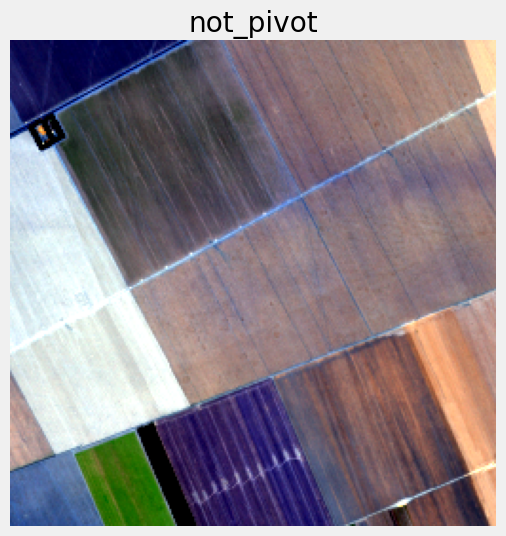

In [ ]:
i=2500
plt.figure(figsize=[6,6])
plt.title(class_list[Y[i]])
plt.imshow(X[i,:,:,:])
plt.axis('off')

Vamos dividir os dados em treinamento e teste:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=126)

In [ ]:
x_train.shape

(2004, 256, 256, 3)

In [ ]:
y_train.shape

(2004,)

In [ ]:
x_test.shape

(502, 256, 256, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Activation, ZeroPadding2D
from keras.regularizers import l2
from tensorflow.keras.optimizers.legacy import Adam

In [ ]:
rede_neural = Sequential()
rede_neural.add(Conv2D(32, (3,3), input_shape = (256,256,3), activation='relu'))
rede_neural.add(MaxPooling2D(pool_size=(2,2)))

rede_neural.add(Conv2D(32, (3,3), activation='relu'))
rede_neural.add(MaxPooling2D(pool_size=(2,2)))

rede_neural.add(Flatten())

#rede_neural.add(Dense(units = 4, activation='relu'))
#rede_neural.add(Dense(units = 4, activation='relu'))
#rede_neural.add(Dense(units = 2, activation='relu'))
#rede_neural.add(Dense(units = 1, activation='sigmoid'))
rede_neural.add(Dense(units=128, activation='relu'))
rede_neural.add(Dense(units=64, activation='relu'))
rede_neural.add(Dense(units=32, activation='relu'))
rede_neural.add(Dense(units=16, activation='relu'))
rede_neural.add(Dense(units=1, activation='sigmoid'))


In [ ]:
#rede_neural.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-3, decay=1e-3), metrics=['accuracy'])
#rede_neural.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
#rede_neural.summary()

In [ ]:
'''def alexnet_model(img_shape=(224, 224, 3),l2_reg=0.,weights=None):

	# Initialize model
	alexnet = Sequential()

	# Layer 1
	alexnet.add(Conv2D(96, (11, 11), input_shape=img_shape,padding='same', kernel_regularizer=l2(l2_reg)))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 2
	alexnet.add(Conv2D(256, (5, 5), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 3
	alexnet.add(ZeroPadding2D((1, 1)))
	alexnet.add(Conv2D(512, (3, 3), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 4
	alexnet.add(ZeroPadding2D((1, 1)))
	alexnet.add(Conv2D(1024, (3, 3), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))

	# Layer 5
	alexnet.add(ZeroPadding2D((1, 1)))
	alexnet.add(Conv2D(1024, (3, 3), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 6
	alexnet.add(Flatten())
	alexnet.add(Dense(3072))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(Dropout(0.5))

	# Layer 7
	alexnet.add(Dense(4096))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(Dropout(0.5))

	# Layer 8
	alexnet.add(Dense(1))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('sigmoid'))

	if weights is not None:
		alexnet.load_weights(weights)

	return alexnet'''

"def alexnet_model(img_shape=(224, 224, 3),l2_reg=0.,weights=None):\n\n\t# Initialize model\n\talexnet = Sequential()\n\n\t# Layer 1\n\talexnet.add(Conv2D(96, (11, 11), input_shape=img_shape,padding='same', kernel_regularizer=l2(l2_reg)))\n\talexnet.add(BatchNormalization())\n\talexnet.add(Activation('relu'))\n\talexnet.add(MaxPooling2D(pool_size=(2, 2)))\n\n\t# Layer 2\n\talexnet.add(Conv2D(256, (5, 5), padding='same'))\n\talexnet.add(BatchNormalization())\n\talexnet.add(Activation('relu'))\n\talexnet.add(MaxPooling2D(pool_size=(2, 2)))\n\n\t# Layer 3\n\talexnet.add(ZeroPadding2D((1, 1)))\n\talexnet.add(Conv2D(512, (3, 3), padding='same'))\n\talexnet.add(BatchNormalization())\n\talexnet.add(Activation('relu'))\n\talexnet.add(MaxPooling2D(pool_size=(2, 2)))\n\n\t# Layer 4\n\talexnet.add(ZeroPadding2D((1, 1)))\n\talexnet.add(Conv2D(1024, (3, 3), padding='same'))\n\talexnet.add(BatchNormalization())\n\talexnet.add(Activation('relu'))\n\n\t# Layer 5\n\talexnet.add(ZeroPadding2D((1, 1)))\n

In [ ]:
input_shape = x_train.shape[1:]

In [ ]:
def alexnet_model(img_shape=(224, 224, 3),l2_reg=0.,weights=None):

	# Initialize model
	alexnet = Sequential()

	# Layer 1
	alexnet.add(Conv2D(96, (11, 11), input_shape=img_shape,padding='same', kernel_regularizer=l2(l2_reg)))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 2
	'''alexnet.add(Conv2D(256, (5, 5), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))'''

	# Layer 6
	alexnet.add(Flatten())
	'''alexnet.add(Dense(3072))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(Dropout(0.5))'''

	# Layer 7
	alexnet.add(Dense(256))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))

	alexnet.add(Dense(32))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))

	# Layer 8
	alexnet.add(Dense(1))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('sigmoid'))

	if weights is not None:
		alexnet.load_weights(weights)

	return alexnet

In [ ]:
model = alexnet_model(img_shape=input_shape)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00001, decay=1e-6), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 96)      34944     
                                                                 
 batch_normalization (Batch  (None, 256, 256, 96)      384       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 256, 256, 96)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 128, 128, 96)      0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1572864)           0         
                                                                 
 dense_5 (Dense)             (None, 256)              

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
#history = rede_neural.fit(x = x_train, y= y_train, batch_size=32, epochs=100, shuffle=True, validation_split= 0.2)
#history = rede_neural.fit(x = x_train, y= y_train, batch_size=32, epochs=100, verbose=1, shuffle=True, validation_split= 0.2)
#history = rede_neural.fit(x = x_train, y= y_train, epochs=50, shuffle=True)

In [ ]:
history = model.fit(x = x_train, y= y_train, batch_size=8, epochs=75, verbose=1, shuffle=True, validation_split= 0.2)

Epoch 1/75
201/201 [==============================] - 35s 152ms/step - loss: 0.6024 - accuracy: 0.6862 - val_loss: 0.4842 - val_accuracy: 0.8105
Epoch 2/75
201/201 [==============================] - 30s 150ms/step - loss: 0.4950 - accuracy: 0.8147 - val_loss: 0.5614 - val_accuracy: 0.6883
Epoch 3/75
201/201 [==============================] - 31s 154ms/step - loss: 0.4458 - accuracy: 0.8852 - val_loss: 0.5035 - val_accuracy: 0.7606
Epoch 4/75
201/201 [==============================] - 32s 157ms/step - loss: 0.4272 - accuracy: 0.9226 - val_loss: 0.6524 - val_accuracy: 0.5686
Epoch 5/75
201/201 [==============================] - 30s 151ms/step - loss: 0.4245 - accuracy: 0.9158 - val_loss: 0.5251 - val_accuracy: 0.7805
Epoch 6/75
201/201 [==============================] - 32s 157ms/step - loss: 0.4369 - accuracy: 0.9145 - val_loss: 0.4351 - val_accuracy: 0.8728
Epoch 7/75
201/201 [==============================] - 32s 157ms/step - loss: 0.4083 - accuracy: 0.9513 - val_loss: 0.5861 - val_ac

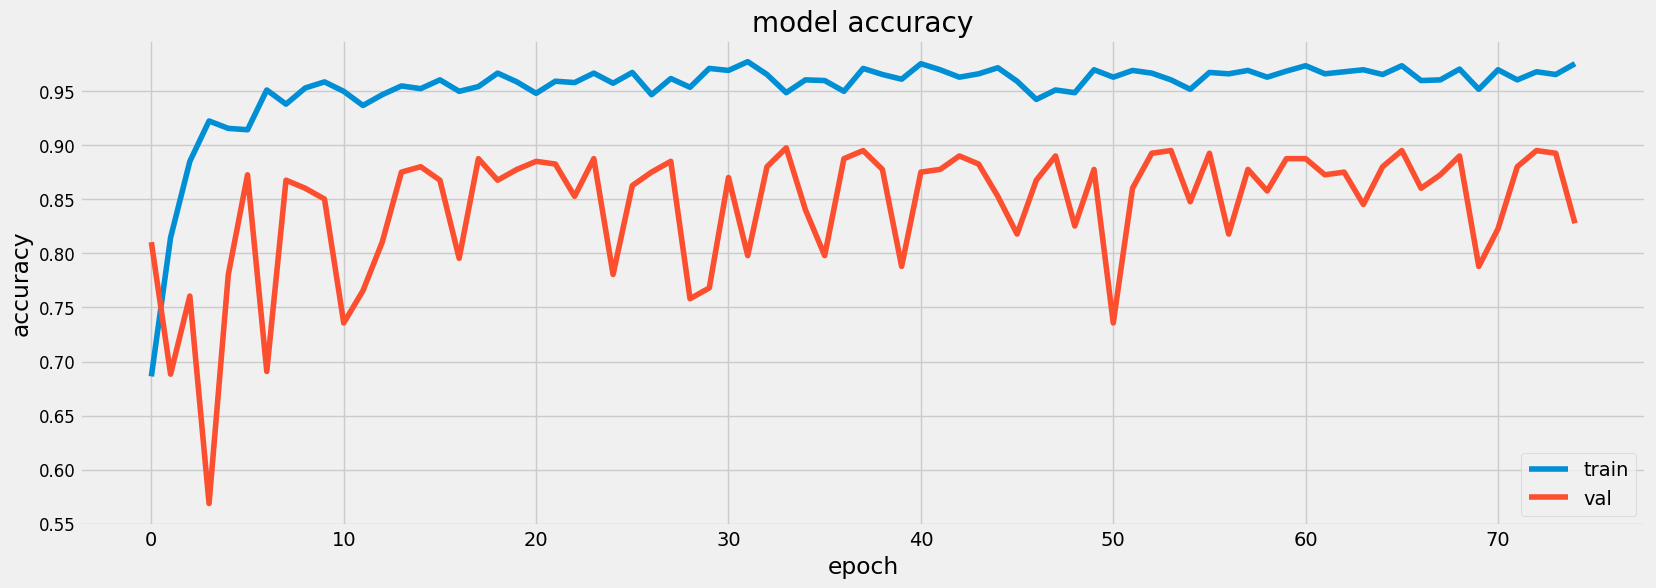

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

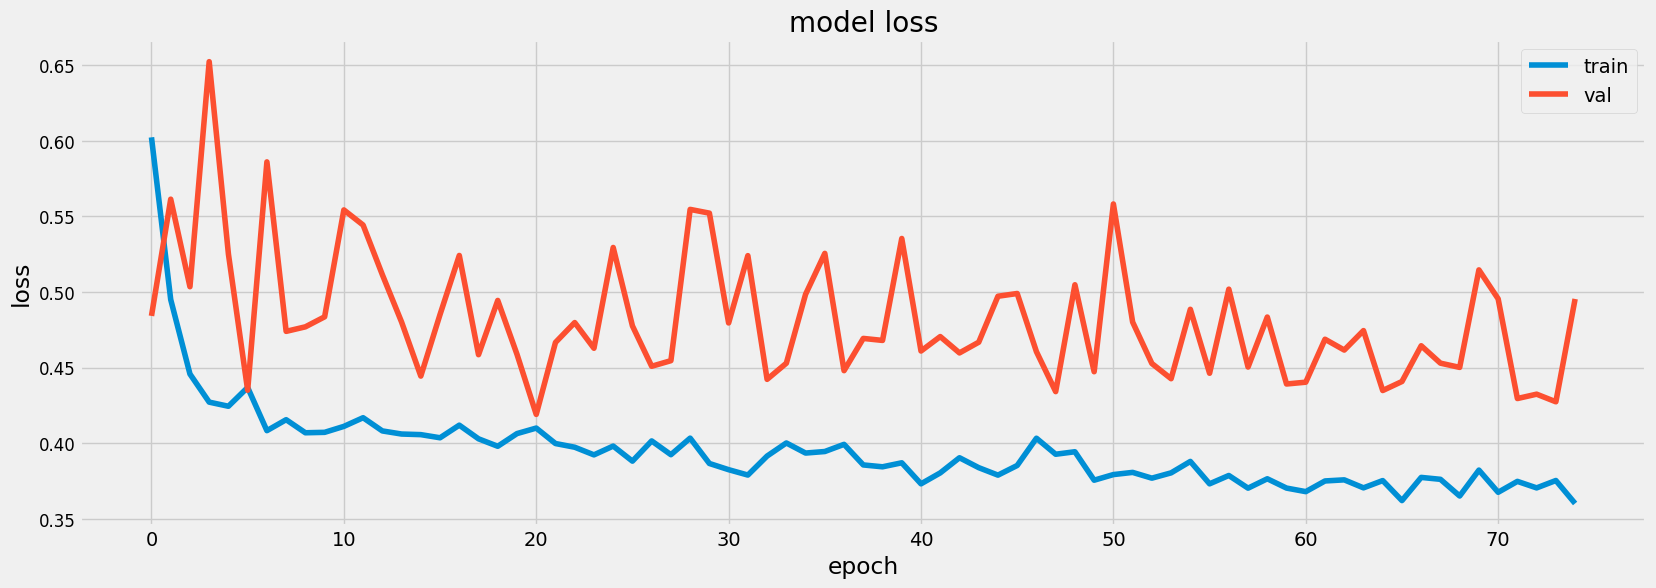

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

# 1. Rodar as imagens de teste através do modelo
predictions = model.predict(x_test)
# 2. Converter as previsões para classes
threshold = 0.5  # Threshold para converter probabilidades em classes binárias
binary_predictions = (predictions > threshold).astype(int)

# 3. Calcular as métricas de avaliação
accuracy = accuracy_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
conf_matrix = confusion_matrix(y_test, binary_predictions)

print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

16/16 [==============================] - 1s 84ms/step
Accuracy: 0.8187250996015937
F1-score: 0.718266253869969
Precision: 0.6304347826086957
Recall: 0.8345323741007195
Confusion Matrix:
 [[295  68]
 [ 23 116]]


In [ ]:
names = ['Pivo','Não Pivo']

Text(0.5, 26.583333333333286, 'Predict')

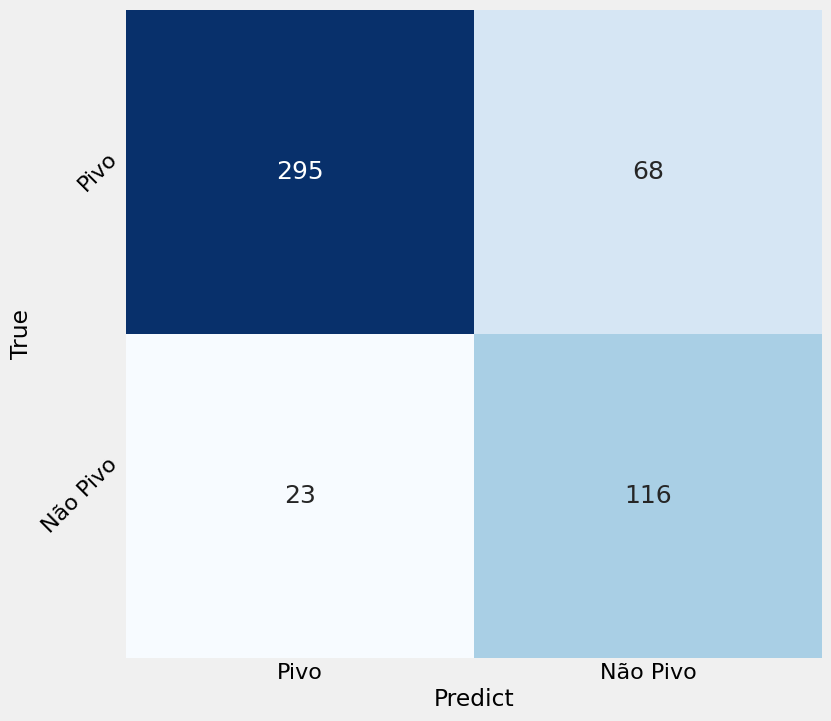

In [ ]:
r1 = pd.DataFrame(data=conf_matrix, index= names, columns=names)
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(r1, annot=True, annot_kws={"size": 18},fmt='d',cmap="Blues", cbar = False)
ax.tick_params(labelsize=16)
ax.set_yticklabels(names, rotation=45)
ax.set_ylabel('True')
ax.set_xlabel('Predict')

(-0.5, 255.5, 255.5, -0.5)

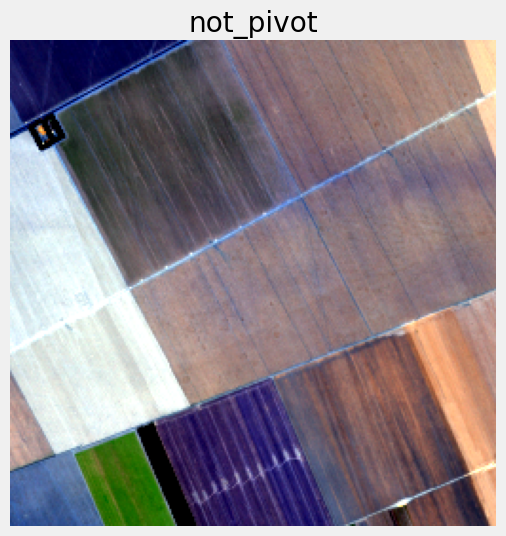

In [ ]:
i=2500
plt.figure(figsize=[6,6])
plt.title(class_list[Y[i]])
plt.imshow(X[i,:,:,:])
plt.axis('off')

In [ ]:
print(Y[i])

1


In [ ]:
print(X[i,:,:,:])

[[[ 15   5  75]
  [  5   0  73]
  [ 15   6  73]
  ...
  [255 221 174]
  [255 234 184]
  [255 228 175]]

 [[ 16  10  73]
  [  9   8  77]
  [  8   3  72]
  ...
  [255 230 178]
  [255 228 178]
  [255 229 179]]

 [[ 15   8  76]
  [ 12   8  78]
  [  5   2  70]
  ...
  [255 229 176]
  [255 229 179]
  [255 231 182]]

 ...

 [[ 33  63 119]
  [ 46  76 138]
  [ 46  76 137]
  ...
  [238 179 140]
  [255 186 140]
  [255 195 147]]

 [[ 34  67 131]
  [ 36  68 133]
  [ 53  81 147]
  ...
  [234 173 132]
  [255 188 137]
  [255 192 145]]

 [[ 38  74 143]
  [ 31  68 136]
  [ 39  75 140]
  ...
  [220 165 128]
  [247 187 140]
  [255 189 143]]]


1/1 [==============================] - 0s 68ms/step
not_pivot


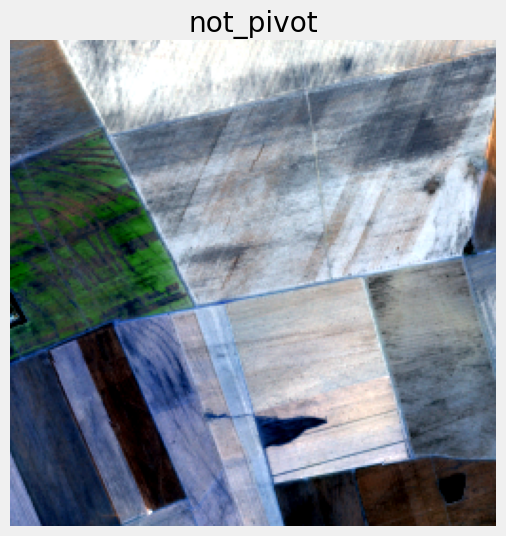

In [ ]:
i=1920
# Pré-processamento da imagem
image = X[i]  # Supondo que 'X' seja o conjunto de imagens

# Previsão do modelo
prediction = model.predict(np.expand_dims(image, axis=0))  # Realiza a previsão da imagem

# Interpretação do resultado
predicted_class = 1 if prediction > 0.5 else 0  # Supondo que seja um problema de classificação binária
predicted_class_label = class_list[predicted_class]  # Obtém o rótulo da classe prevista

print(predicted_class_label)

# Mostrar a imagem com o título contendo a classe prevista
plt.figure(figsize=[6,6])
plt.title(predicted_class_label)
plt.imshow(image)
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 28ms/step


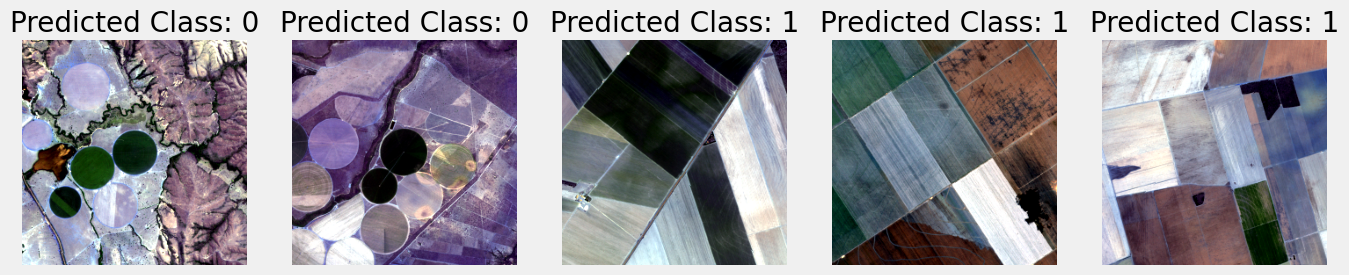

In [ ]:
# Lista de índices das imagens que você deseja fazer previsões
indices = [800, 1326, 1895, 2503, 2421]

# Configuração da plotagem
plt.figure(figsize=[15, 3])  # Define o tamanho da figura para exibir as imagens em uma linha

# Loop sobre os índices das imagens
for i, idx in enumerate(indices):
    # Pré-processamento da imagem
    image = X[idx]  # Supondo que 'X' seja o conjunto de imagens

    # Previsão do modelo
    prediction = model.predict(np.expand_dims(image, axis=0))  # Realiza a previsão da imagem
    predicted_class = 1 if prediction > 0.5 else 0  # Supondo que seja um problema de classificação binária

    # Exibição da imagem junto com a previsão
    plt.subplot(1, len(indices), i+1)  # Define a posição da subparcela
    plt.imshow(image)
    plt.title('Predicted Class: {}'.format(predicted_class))
    plt.axis('off')

plt.show()  # Exibe a figura com todas as imagens e suas previsões

In [ ]:
print('teste')

teste
